**IMPORTING NECCESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING DATASET**

In [2]:
data =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/Crime_Prediction__Dataset.csv')

**DISPLAY SOME DATA RECORDS**

In [3]:
#Display Last five Record from the dataset
data.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year
0,JF404118,9/20/2022 17:43,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,2022
1,JF500029,12/6/2022 11:01,NARCOTICS,POSSESS - HEROIN (WHITE),SIDEWALK,True,False,2022
2,JF352663,8/11/2022 11:07,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,GOVERNMENT BUILDING / PROPERTY,True,False,2022
3,JF394425,9/13/2022 12:45,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),SIDEWALK,True,False,2022
4,JF494435,11/30/2022 18:00,NARCOTICS,FOUND SUSPECT NARCOTICS,COMMERCIAL / BUSINESS OFFICE,True,False,2022


In [4]:
#Display Last five Record from the dataset
data.tail()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year
2995,JF128182,1/29/2022 18:50,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,2022
2996,JF105421,1/6/2022 22:30,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,2022
2997,JF112502,1/11/2022 16:00,ROBBERY,STRONG ARM - NO WEAPON,SIDEWALK,False,False,2022
2998,JF105747,1/7/2022 10:34,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,SIDEWALK,True,False,2022
2999,JF159150,2/28/2022 17:00,ROBBERY,ATTEMPT AGGRAVATED,STREET,False,False,2022


In [5]:
#Display  Dataset Shape
print ("Numbers of rows", data.shape[0])
print ("Numbers of rows", data.shape[1])

Numbers of rows 3000
Numbers of rows 8


In [6]:
#Display  Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Case Number           3000 non-null   object
 1   Date                  3000 non-null   object
 2   Primary Type          3000 non-null   object
 3   Description           3000 non-null   object
 4   Location Description  3000 non-null   object
 5   Arrest                3000 non-null   bool  
 6   Domestic              3000 non-null   bool  
 7   Year                  3000 non-null   int64 
dtypes: bool(2), int64(1), object(5)
memory usage: 146.6+ KB


In [7]:
#Check if null Values exist from the Dataset
data.isnull().sum()

,0
Case Number,0
Date,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0
Year,0


In [8]:
#Display Result of Statistical Computation
data.describe()

,Year
count,3000.0
mean,2022.0
std,0.0
min,2022.0
25%,2022.0
50%,2022.0
75%,2022.0
max,2022.0


In [9]:
#Data Preprocessing Continue
data_copy = data.copy(deep=True)

In [10]:
data.columns

Index(['Case Number', 'Date', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Year'],
      dtype='object')

**DATA PREPROCESSING**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_set =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/Crime_Prediction__Dataset.csv')

# Delete the useless columns:
cols_to_drop = ['Case Number', 'Date', 'Location Description']
data_set = data_set.drop(columns=cols_to_drop)

# Replace the value repeated if there is in the dataset: e.g.
columns = ["Description","Arrest", "Domestic"]
for col in columns:
    data_set[col] = data_set[col].astype('category')
    data_set[col] = data_set[col].cat.codes

# Delete all the duplicated rows:
data_set.drop_duplicates(keep='last')

# Save the new datasets into a new csv file:
data_set.to_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/PredPreprocessedCrimeDataSet.csv')

**DISPLAY RECORD AFTER DATA PREPROCESSING**

Text(0, 0.5, 'frequency')

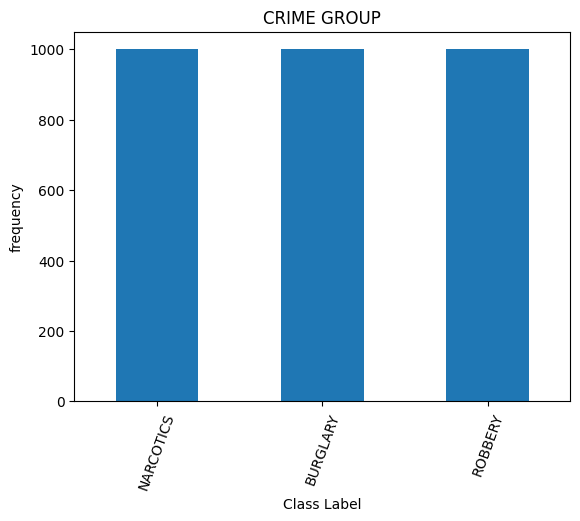

In [12]:
data_set =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/PredPreprocessedCrimeDataSet.csv')
count_classes = pd.Series(data['Primary Type']).value_counts()
count_classes.plot(kind='bar', rot=70)
plt.title("CRIME GROUP")
plt.xlabel("Class Label")
plt.ylabel("frequency")

**DATA CORRELATION**

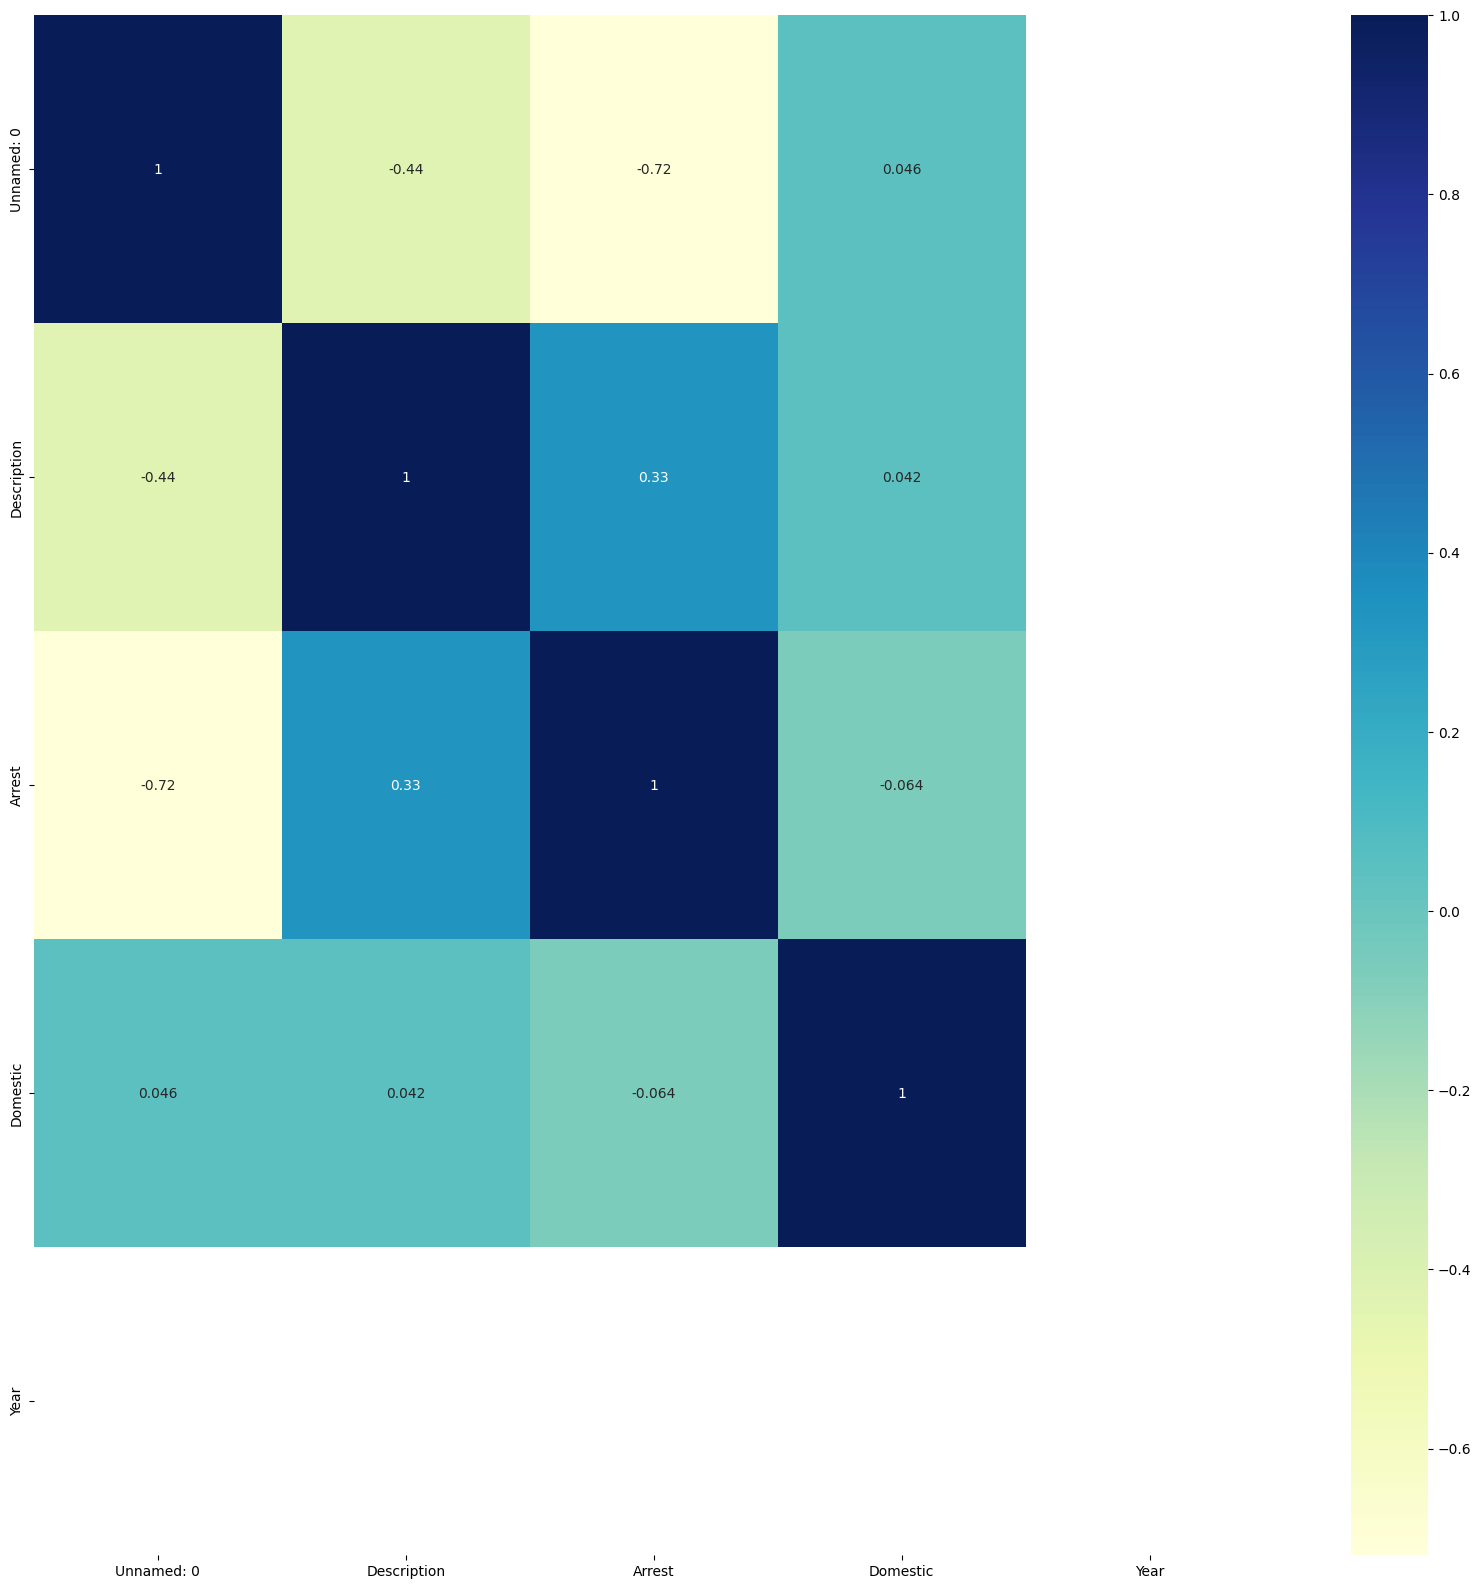

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = ['Primary Type']
data_set = data_set.drop(columns=cols_to_drop)

corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_set[top_corr_features].corr(),annot=True,cmap="YlGnBu")
plt.show()

**STORE FUTURE MATRIX IN X (OUR INDEPENDENT VARIABLES OR TARGET) I VECTOR Y**

In [14]:
import pandas as pd
import numpy as np
# Load dataset
data_set =pd.read_csv('/content/drive/My Drive/Colab-Notebooks/Musabu/PredPreprocessedCrimeDataSet.csv')
data_set = data_set.loc[:, ~data_set.columns.str.contains('^Unnamed')]
X = data_set.drop('Primary Type',axis=1)
y = data_set['Primary Type']

**SPLITTING DATASET INTO THE TRAINING AND TESTING SET TO CHECK THE PERFORMANCE OF OUR MACHINE**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [ ]:
#Display  Dataset Information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Primary Type  3000 non-null   object
 1   Description   3000 non-null   int64 
 2   Arrest        3000 non-null   int64 
 3   Domestic      3000 non-null   int64 
 4   Year          3000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


**CREATING MACHINE LEARNING PIPELINE USING SKLEARN-LEARN**

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                       ('lr_classifier', LogisticRegression())])

pipeline_svm = Pipeline([('scaler2', StandardScaler()),
                       ('svc_classifier', SVC())])

pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(max_depth=3))])

pipelines = [pipeline_lr,
             pipeline_svm,
             pipeline_dt,
             pipeline_rf]

pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)

pipe_dict = {0:'LogisticRegression',
            1:'SupportVectorClassifier',
            2:'DecisionTreeClassifier',
            3:'RandomForestClassifier'}

pipe_dict

for i,model in enumerate(pipelines): print("{} Test Accurancy: {}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LogisticRegression Test Accurancy: 66.16666666666666
SupportVectorClassifier Test Accurancy: 89.33333333333333
DecisionTreeClassifier Test Accurancy: 99.83333333333333
RandomForestClassifier Test Accurancy: 90.33333333333333


**Since the DECISION TREE Model Has the Highest Accuracy, Let's choose this model and make our predictions**

**FITTING MY MACHINE LEARNING MODEL**

**DICISION TREE**

In [17]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Fit SVM Classifier
#sv = svm.SVC(kernel='linear',
           # decision_function_shape='ovr')
#sv.fit(X,y)

# Fit Random Forest Classifier
#rf = RandomForestClassifier(
   # n_estimators=300,
   # random_state=42
#)
#rf.fit(X,y)

# Fit Logistic Regression
#lr = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42)
#dt.fit(X, y)

# Fit Decision Tree Classifier
dt = DecisionTreeClassifier(
    criterion="gini",      # or "entropy"
    max_depth=20,        # limit tree depth to avoid overfitting
    random_state=42
)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [18]:
data_set.head(3000)

,Primary Type,Description,Arrest,Domestic,Year
0,NARCOTICS,24,1,0,2022
1,NARCOTICS,38,1,0,2022
2,NARCOTICS,33,1,0,2022
3,NARCOTICS,19,1,0,2022
4,NARCOTICS,17,1,0,2022
...,...,...,...,...,...
2995,ROBBERY,1,0,0,2022
2996,ROBBERY,1,0,0,2022
2997,ROBBERY,45,0,0,2022
2998,ROBBERY,13,1,0,2022


**TESTING FROM UNSEEN DATA**

In [19]:
new_data = pd.DataFrame({
    'Description':13,
    'Arrest':1,
    'Domestic':0,
    'Year':2022
    },index=[0])

p = dt.predict(new_data)
print("Predicted Crime Committed is: ", p[0].capitalize())

Predicted Crime Committed is:  Robbery


**VISUALIZATION OF REPORT**

Accuracy: 90.33333333333333
F1 Score: 90.20949928951613
Precision: 92.14600756670649
Recall: 90.33333333333333


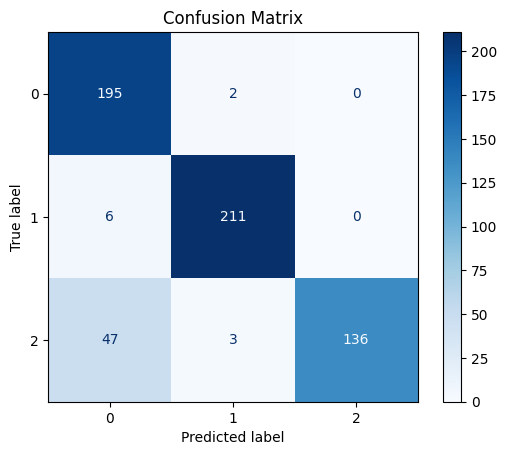

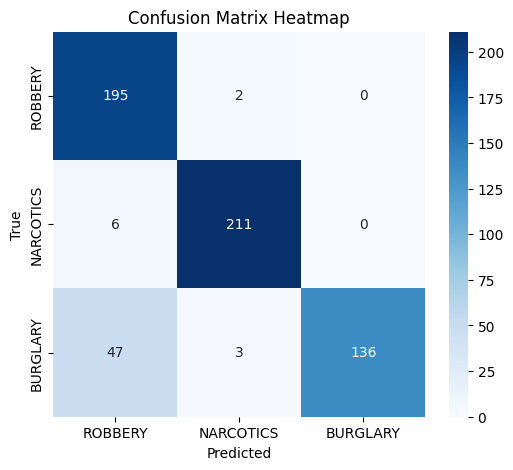

              precision    recall  f1-score   support

    BURGLARY       0.79      0.99      0.88       197
   NARCOTICS       0.98      0.97      0.97       217
     ROBBERY       1.00      0.73      0.84       186

    accuracy                           0.90       600
   macro avg       0.92      0.90      0.90       600
weighted avg       0.92      0.90      0.90       600



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate predictions using your trained model
y_pred = model.predict(X_test)  # model should already be trained

# Step 2: Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted') * 100)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 100)
print("Recall:", recall_score(y_test, y_pred, average='weighted') * 100)

# After you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Option 1: Quick plot with sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Option 2: Prettier heatmap with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Report
print(classification_report(y_test, y_pred))

**EVALUATION OF MODEL**

Accuracy: 90.33333333333333
F1 Score: 90.20949928951613
Precision: 92.14600756670649
Recall: 90.33333333333333


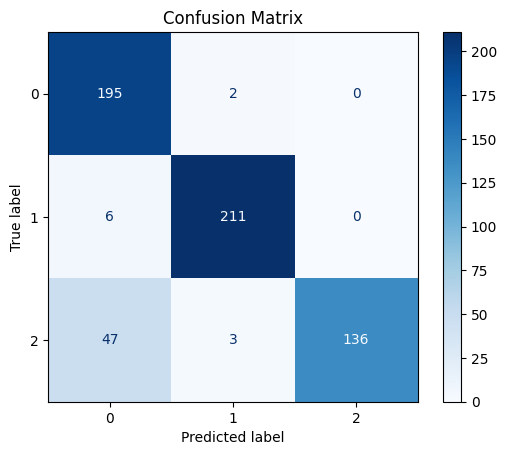

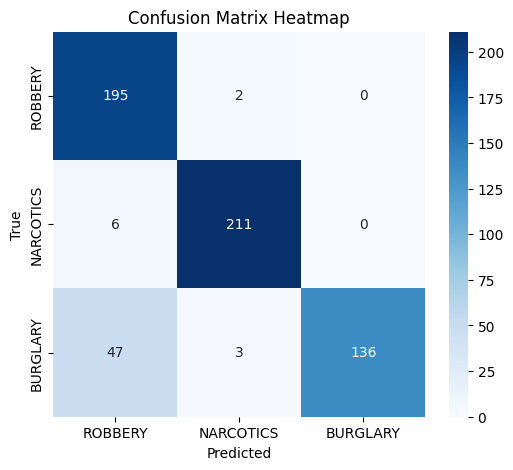

              precision    recall  f1-score   support

    BURGLARY       0.79      0.99      0.88       197
   NARCOTICS       0.98      0.97      0.97       217
     ROBBERY       1.00      0.73      0.84       186

    accuracy                           0.90       600
   macro avg       0.92      0.90      0.90       600
weighted avg       0.92      0.90      0.90       600



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate predictions using your trained model
y_pred = model.predict(X_test)  # model should already be trained

# Step 2: Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted') * 100)
print("Precision:", precision_score(y_test, y_pred, average='weighted') * 100)
print("Recall:", recall_score(y_test, y_pred, average='weighted') * 100)

# After you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Option 1: Quick plot with sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Option 2: Prettier heatmap with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Report
print(classification_report(y_test, y_pred))